# Question 1: Denoising Images with Autoencoders

# 1. Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam


# 2. Load CIFAR-10 Dataset

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize the images to [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)  # (50000, 32, 32, 3)
print(x_test.shape)   # (10000, 32, 32, 3)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


# 3. Add Random Noise

In [4]:
noise_factor = 0.1

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip to [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 4. Build the Autoencoder Model

In [5]:
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Compile model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,507 (115.26 KB)

 Trainable params: 29,507 (115.26 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Train the Autoencoder

In [6]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 152s 382ms/step - loss: 0.5999 - val_loss: 0.5665
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 374ms/step - loss: 0.5643 - val_loss: 0.5633
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 379ms/step - loss: 0.5628 - val_loss: 0.5621
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 374ms/step - loss: 0.5617 - val_loss: 0.5612
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 377ms/step - loss: 0.5598 - val_loss: 0.5612
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 377ms/step - loss: 0.5602 - val_loss: 0.5606
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 372ms/step - loss: 0.5596 - val_loss: 0.5599
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 374ms/step - loss: 0.5592 - val_loss: 0.5596
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 205s 384ms/step - loss: 0.5588 - val_loss: 0.5594
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 197s 371ms/step - loss: 0.5592 - val_loss: 0.5591


# 6. Visualize the Denoising Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


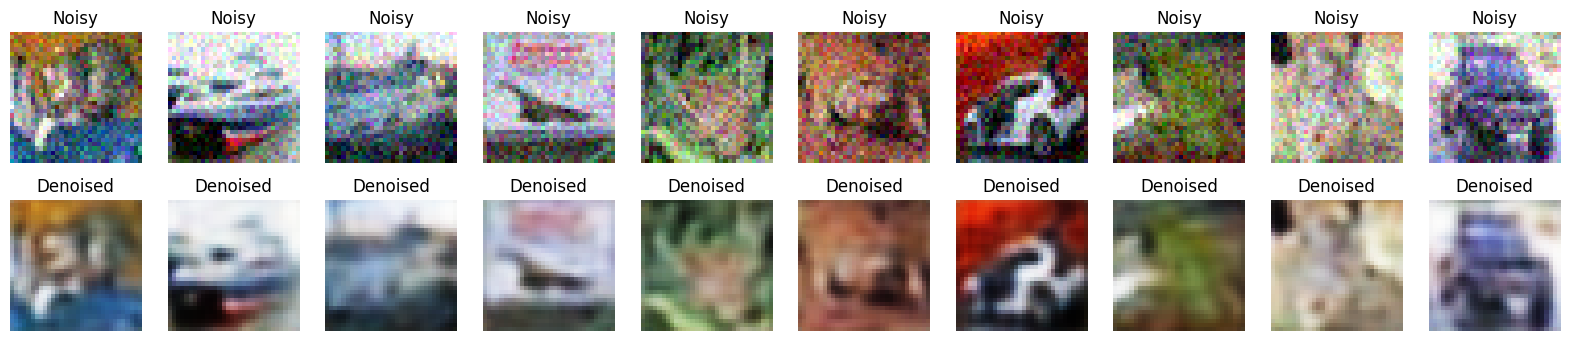

In [7]:
# Predict on test noisy images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original noisy and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis('off')
plt.show()

# Question 2: CIFAR-10 dataset reconstruction

# 1. Import Required Libraries



In [1]:


import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np



# 2. Load and Preprocess the CIFAR-10 Data

In [3]:
# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the pixel values to [0, 1]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1883s 11us/step


# Step 3: Build the Encoder

In [29]:
latent_dim = 64  # Dimension of the latent space

# Encoder network
encoder_inputs = tf.keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

# Sampling layer
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])


#  Step 4: Build the Decoder

In [31]:
# Decoder network
decoder_inputs = tf.keras.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 64, activation='relu')(decoder_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation='sigmoid', padding='same')(x)


# 5. Define the VAE Model

In [33]:
# Define the VAE model
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = tf.keras.Model(decoder_inputs, decoder_outputs, name='decoder')
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = tf.keras.Model(encoder_inputs, vae_outputs, name='vae')


# Step 6. Create the VAE LOSS Function

In [39]:
def vae_loss(encoder_inputs, vae_outputs, z_mean, z_log_var):
    # Flatten the inputs and outputs to match shapes
    encoder_inputs_flat = tf.keras.layers.Flatten()(encoder_inputs)
    vae_outputs_flat = tf.keras.layers.Flatten()(vae_outputs)
    
    reconstruction_loss = tf.keras.losses.binary_crossentropy(encoder_inputs_flat, vae_outputs_flat)
    reconstruction_loss *= 32 * 32 * 3
    kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
    kl_loss = tf.reduce_sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return tf.reduce_mean(reconstruction_loss + kl_loss)


# Step 7: Compile and Train the VAE

In [41]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam()

# Custom training loop
epochs = 10
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).batch(batch_size)

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    for step, x_batch_train in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = encoder(x_batch_train)
            reconstructed = decoder(z)
            loss = vae_loss(x_batch_train, reconstructed, z_mean, z_log_var)
        grads = tape.gradient(loss, vae.trainable_weights)
        optimizer.apply_gradients(zip(grads, vae.trainable_weights))
        
        if step % 100 == 0:
            print(f'Step {step}: loss = {loss.numpy()}')

    # Validation loss
    val_loss = 0
    for x_batch_test in test_dataset:
        z_mean, z_log_var, z = encoder(x_batch_test)
        reconstructed = decoder(z)
        val_loss += vae_loss(x_batch_test, reconstructed, z_mean, z_log_var)
    val_loss /= len(test_dataset)
    print(f'Validation loss: {val_loss.numpy()}')


Epoch 1/10
Step 0: loss = 2129.52783203125
Step 100: loss = 2042.724853515625
Step 200: loss = 1954.3223876953125
Step 300: loss = 1939.743896484375
Validation loss: 1909.2158203125
Epoch 2/10
Step 0: loss = 1897.0162353515625
Step 100: loss = 1878.666748046875
Step 200: loss = 1869.2650146484375
Step 300: loss = 1868.535888671875
Validation loss: 1873.0799560546875
Epoch 3/10
Step 0: loss = 1870.2193603515625
Step 100: loss = 1853.557861328125
Step 200: loss = 1873.8114013671875
Step 300: loss = 1872.5992431640625
Validation loss: 1861.7496337890625
Epoch 4/10
Step 0: loss = 1816.892333984375
Step 100: loss = 1858.003173828125
Step 200: loss = 1832.9697265625
Step 300: loss = 1800.36083984375
Validation loss: 1856.4971923828125
Epoch 5/10
Step 0: loss = 1813.919677734375
Step 100: loss = 1805.68310546875
Step 200: loss = 1827.705322265625
Step 300: loss = 1868.620849609375
Validation loss: 1852.8045654296875
Epoch 6/10
Step 0: loss = 1880.9591064453125
Step 100: loss = 1850.9499511718

# Step 8: Reconstruct Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step


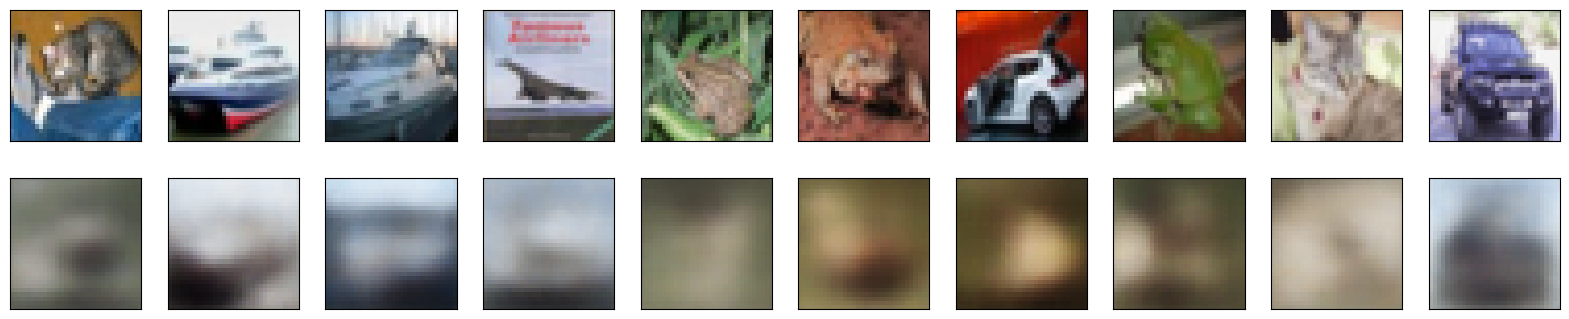

In [43]:
import matplotlib.pyplot as plt

# Reconstruct images
decoded_imgs = vae.predict(x_test)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
